In [1]:
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [2]:
import mlflow

In [3]:
mlflow.set_tracking_uri("http://192.168.7.95:8000/")

In [4]:
from pycaret.regression import *
s = setup(data,target='Price',transform_target=True,
         log_experiment=True,
         log_plots=True,
         experiment_name = 'diamond',
         )

,Description,Value
0,Session id,2172
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


2023/09/01 12:51:28 INFO mlflow.tracking.fluent: Experiment with name 'diamond' does not exist. Creating a new experiment.


In [5]:
best = compare_models(exclude=['ransac','lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,629.4934,1555357.1224,1234.2483,0.9848,0.0671,0.0492,0.0960
et,Extra Trees Regressor,737.7916,2120242.9236,1429.7910,0.9795,0.0798,0.0590,0.1930
rf,Random Forest Regressor,736.8252,2304814.8663,1481.3582,0.9783,0.0793,0.0576,0.1770
gbr,Gradient Boosting Regressor,758.0404,2466301.5959,1534.9388,0.9762,0.0778,0.0577,0.1060
dt,Decision Tree Regressor,936.7626,3727697.0770,1885.7473,0.9642,0.1011,0.0739,0.0580
ada,AdaBoost Regressor,1969.0297,16556579.1373,3956.4725,0.8457,0.1892,0.1526,0.0970
knn,K Neighbors Regressor,3073.4515,36687412.3457,6025.1671,0.6396,0.3657,0.2373,0.0570
omp,Orthogonal Matching Pursuit,3260.2112,73279413.2543,8390.2497,0.2902,0.2798,0.2203,0.0530
lasso,Lasso Regression,6604.7646,115090377.2833,10675.7090,-0.1257,0.7158,0.5711,0.0550
en,Elastic Net,6604.7646,115090377.2833,10675.7090,-0.1257,0.7158,0.5711,0.0580


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

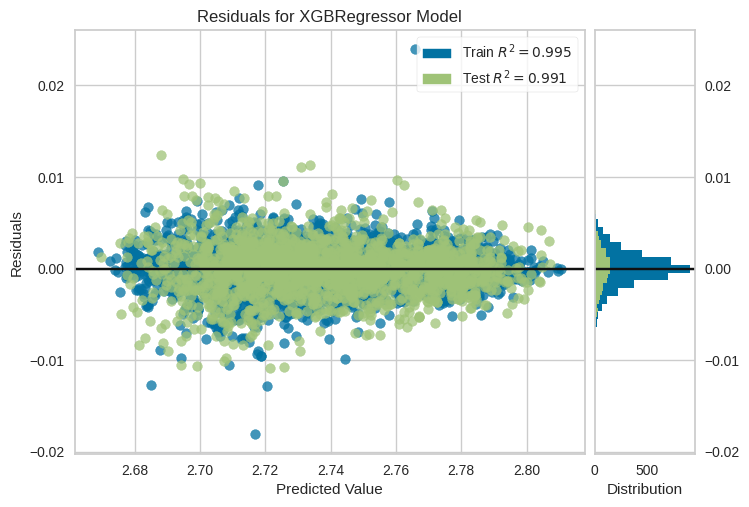

In [6]:
# check the residuals of trained model
plot_model(best, plot = 'residuals')

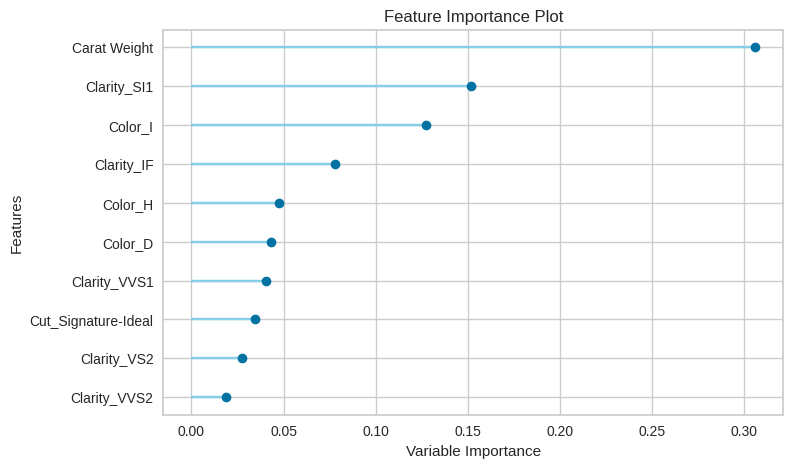

In [7]:
# check feature importance
plot_model(best, plot = 'feature')

In [8]:
# finalize the model
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', '...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=n

In [9]:
import mlflow
import pandas as pd
logged_model = 'runs:/90dbf3601ae44a0c94910c77a92bca46/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

In [10]:
# Predict on a Pandas DataFrame.
data = pd.DataFrame(data)

In [11]:
loaded_model.predict(pd.DataFrame(data.iloc[:,:-1]))

0        5498.402344
1        3537.871582
2        3430.375977
3        4477.503418
4        3353.764404
            ...     
5995     6280.140137
5996     5710.277344
5997     6222.965820
5998    11251.864258
5999    34933.996094
Name: Price, Length: 6000, dtype: float32

In [12]:
# print pipeline
print(loaded_model)

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 90dbf3601ae44a0c94910c77a92bca46



In [34]:
# pipeline = load_model('~/mlruns/3/413d6aa6b13c4c8d9e81d79efd309ece/artifacts/model/')
data = get_data('diamond')

# create a copy of data and drop Price
data2 = data.copy()
data2.drop('Price', axis=1, inplace=True)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [36]:
# generate predictions
# from pycaret.regression import predict_model
# predictions = predict_model(pipeline, data=data2)
# predictions.head()